# Алгоритм статистического анализа

<img src="img/scheme.png" width=1100>

## Проверка нормальности распределения

### Графическое распределение (distplot)

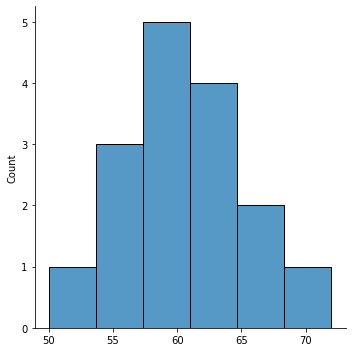

In [2]:
import seaborn as sns
import numpy as np

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

ax = sns.displot(sample, kde = False)

### Критерий Колмогорова-Смирнова (точнее при количестве исследуемых n>50)


### Критерий Шапиро-Уилка (точнее при количестве исследуемых n<50)
H0 - данные распределены нормально

In [79]:
import pandas as pd

data = pd.DataFrame({'a': [50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72]})

stats.shapiro(data.a)

# в случае большого количества данных используем выборку - sample:
# stats.shapiro(df.column.sample(1000, random_state=17))
# т.к. тест Шапиро-Уилка чувствителен к большим совокупностям.
# Cчитаем, что если ген. совокупность распределена нормально, то и выборки тоже будут нормальными.
# Но тогда прогоняем тест несколько раз, чтобы убедиться в стабильность результатов.
# random_state=17 - для стабилизации расчета p-value при сэмплировании

#p >= 0.05 - нет оснований отклонить H0, данные распределены нормально

ShapiroResult(statistic=0.9803240299224854, pvalue=0.9661158323287964)

In [81]:
import numpy as np
from scipy import stats

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

W, p = stats.shapiro(sample)
print("Shapiro-Wilk test, W:", W, "p-value:", p)

alpha = 0.05
if p > alpha:
    print('Принять гипотезу о нормальности')
else:
    print('Отклонить гипотезу о нормальности')

Shapiro-Wilk test, W: 0.9803240299224854 p-value: 0.9661158323287964
Принять гипотезу о нормальности


### qq-plot

##### scipy

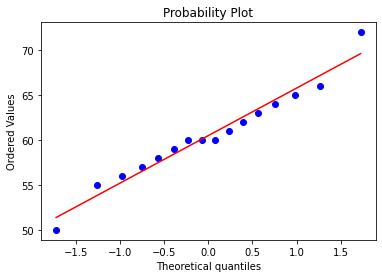

In [77]:
import numpy as np 
import pylab 
import scipy.stats as stats

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

stats.probplot(sample, dist="norm", plot=pylab)
pylab.show()

##### pingouin

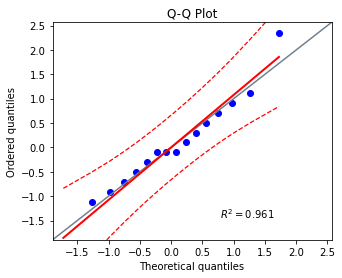

In [162]:
import pingouin as pg

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

ax = pg.qqplot(sample, dist='norm')

## Описательная статистика

### Мода, медиана и среднее

In [6]:
import numpy as np
from scipy import stats

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

print('mode:', stats.mode(sample))
print('median:', np.median(sample))
print('mean:', np.mean(sample))

mode: ModeResult(mode=array([60]), count=array([3]))
median: 60.0
mean: 60.5


In [7]:
import pandas as pd

sample = pd.Series([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())

mode: 0    60
dtype: int64
median: 60.0
mean: 60.5


In [114]:
import pandas as pd

sample = pd.Series([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

sample.describe()

count    16.000000
mean     60.500000
std       5.072803
min      50.000000
25%      57.750000
50%      60.000000
75%      63.250000
max      72.000000
dtype: float64

### Размах, дисперсия и стандартное отклонение

In [115]:
import numpy as np
import pandas as pd

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

# размах -  разность между max и min значением из распределения
range = np.max(sample)- np.min(sample)
print(f'range = {range}')

range_2 = np.percentile(sample, [0, 100])
print(f'range(other count way) = {range_2}')

# дисперсия - средний квадрат отклонений индивидуальных значений признака от их средней величины
D = np.var(sample)
print(f'D = {D}')
# или df.A.var() , если через pandas

# cреднеквадратическое (стандартное) отклонение - корень из дисперсии
sd = np.std(sample, ddof=1)
print(f'sd = {sd}')
# или df.A.std() , если через pandas

range = 22
range(other count way) = [50. 72.]
D = 24.125
sd = 5.072803301265814


### boxplot

/home/at/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/at/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


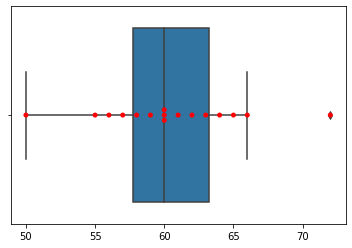

In [9]:
import seaborn as sns

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

ax = sns.boxplot(sample)
ax = sns.swarmplot(sample, color = 'Red') # дополнительное наложение точек

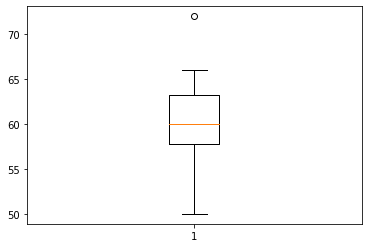

In [10]:
import matplotlib.pyplot as plt

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

plt.boxplot(sample, showfliers=1)
plt.show()

### Доверительный интервал
среднее значение генеральной совокупности принадлежит рассчитанному доверительному интервалу с заданной вероятностью (например, 95%)

95% - μ±1.96se; 99% - μ±2.58se

In [11]:
# если считать по формулам и известны меры центральной тенденции и меры изменчивости

from numpy import sqrt
from scipy import stats

p = 0.95  # % интервала
mean = 60.5
std = 5.072803301265814
n = 16

se = std/sqrt(n)
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)
сonf_interval = mean - sigma*se, mean + sigma*se

print(сonf_interval)

(58.01437205721578, 62.98562794278422)


In [12]:
# с помощью методов библиотек

import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

# первый способ
print(st.t.interval(0.95, len(sample)-1, loc=np.mean(sample), scale=st.sem(sample)))
# второй способ
print(sms.DescrStatsW(sample).tconfint_mean())

(57.79689392720129, 63.20310607279871)
(57.79689392720129, 63.20310607279871)


## Стандартизация (Z-преобразование)
преобразование, которое позволяет любую шкалу перевести в стандартную Z-шкалу (Z-scores), где среднее значение будет равно нулю, а стандартное отклонение – 1. Форма распределения при этом не изменится.

In [13]:
from scipy.stats import zscore

sample = np.array([50, 55, 56, 57, 58, 59, 60, 60, 60, 61, 62, 63, 64, 65, 66, 72])

zscore(sample)

array([-2.13774371, -1.11977052, -0.91617588, -0.71258124, -0.5089866 ,
       -0.30539196, -0.10179732, -0.10179732, -0.10179732,  0.10179732,
        0.30539196,  0.5089866 ,  0.71258124,  0.91617588,  1.11977052,
        2.34133835])

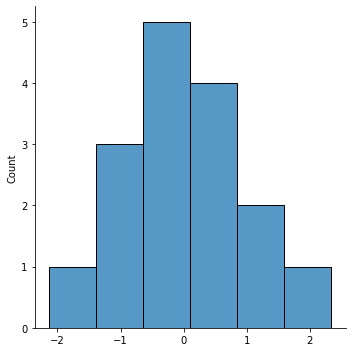

In [14]:
import seaborn as sns

ax = sns.displot(zscore(sample), kde = False)

## Стандартная ошибка среднего (SE)
показывает, насколько выборочное среднее отличается от среднего генеральной совокупности. SE при увеличении размера выборки будет стремиться к нулю.

In [ ]:
# import pandas as pd
# df.A.sem()

# from scipy import stats
# stats.sem(df.A)

## t-критерий Стьюдента для независимых выборок
t-критерий Стьюдента используется для определения статистической значимости различий средних величин.
Н0 - статзначимых различий нет.

Если pvalue >= 0.05, НЕ можем отклонить нулевую гипотезу, т.е. значимых различий нет.

Если pvalue < 0.05, можем отклонить нулевую гипотезу, т.е. группы значимо различаются.

##### scipy 

In [144]:
# по колонкам датафрейма 

import pandas as pd
from scipy import stats

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4]})

stats.ttest_ind(data.a, data.b)

Ttest_indResult(statistic=-2.449489742783178, pvalue=0.07048399691021993)

##### pingouin

In [143]:
# нужно переменным присвоить колонки

import pingouin as pg

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4]})

aa = data.a
bb = data.b

pg.ttest(aa, bb)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-2.44949,4,two-sided,0.070484,"[-4.27, 0.27]",2.0,1.654,0.462641


##### по формулам если известны меры центральной тенденции и меры изменчивости

In [16]:

from scipy.stats import t
from numpy import sqrt

mean_1 = 45
mean_2 = 44
sd_1 = 3
sd_2= 4
n1= 50
n2 = 50

se = sqrt((sd_1 ** 2)/n1 + (sd_2 ** 2)/n2)
t_value = (mean_1 - mean_2)/se
print(f't_value = {t_value}')

p = t.sf(t_value, n1+n2-2)
print(f'p = {p}')

if p >= 0.05:
    print('p >= 0.05, НЕ можем отклонить нулевую гипотезу')
else:
    print('p < 0.05, можем отклонить нулевую гипотезу')

t_value = 1.414213562373095
p = 0.08023418166343646
p >= 0.05, НЕ можем отклонить нулевую гипотезу


## Однофакторный дисперсионный анализ (ANOVA)
анализ для двух или нескольких независимых групп, когда все группы объединены по одному признаку. В ходе анализа проверяется нулевая гипотеза о равенстве средних.

#### 1.Проверяем, являются ли дисперсии внутри групп примерно одинаковыми (гомогенными) с помощью теста Левена (H0 - дисперсии гомогенны).

In [96]:
import pandas as pd
import scipy.stats as stats

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]})
aa = data.a
bb = data.b
cc = data.c

stats.levene(aa, bb, cc)

# pvalue >= 0.05 - дисперсии гомогенны
# pvalue < 0.05 - дисперсии разные

LeveneResult(statistic=0.0, pvalue=1.0)

если дисперсии разные, можно сделать дисперсионный анализ Уэлча (см. п.5)

#### 2. Проверяем нормальность распределения (Шапиро-Уилка).
#### 3. Проводим сам тест (дисперсионный анализ).

##### scipy

In [97]:
from scipy import stats

stats.f_oneway(aa, bb, cc)

# pvalue >= 0.05 - значимых различий между группами нет
# pvalue < 0.05 - значимые различия между группами есть

F_onewayResult(statistic=12.0, pvalue=0.008000000000000002)

##### pingouin

In [98]:
# для него нужно преобразовать датафрейм data к формату двух колонок

data1 = pd.DataFrame({'c1':np.repeat(data.columns,len(data)),
                  'c2':data.to_numpy().transpose().flatten()})

In [100]:
data1

,c1,c2
0,a,3
1,a,1
2,a,2
3,b,5
4,b,3
5,b,4
6,c,7
7,c,6
8,c,5


In [99]:
import pingouin as pg

pg.anova(data = data1, dv = 'c2', between = 'c1')

,Source,ddof1,ddof2,F,p-unc,np2
0,c1,2,6,12.0,0.008,0.8


In [53]:
# здесть F - F-values (то же, что statistic в stats); p-unc - pvalue

#### 4. Определим, между какими группами есть статистически значимые различия с помощью критерия Тьюки

In [104]:
# также работаем с преобразованным data1

##### statsmodels

In [145]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise_tukeyhsd(data1.c2, data1.c1).summary()

# reject = True - H0 отклоняется (т.е. между группам статзначимые различия есть)
# reject = False - H0 принимается

group1,group2,meandiff,p-adj,lower,upper,reject
a,b,2.0,0.1089,-0.5052,4.5052,False
a,c,4.0,0.0065,1.4948,6.5052,True
b,c,2.0,0.1089,-0.5052,4.5052,False


##### pingouin

In [106]:
import pingouin as pg

pg.pairwise_tukey(data = data1, dv = 'c2', between = 'c1')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,a,b,2.0,4.0,-2.0,0.816497,-2.449490,0.108867,-1.6
1,a,c,2.0,6.0,-4.0,0.816497,-4.898979,0.006494,-3.2
2,b,c,4.0,6.0,-2.0,0.816497,-2.449490,0.108867,-1.6


<AxesSubplot:>

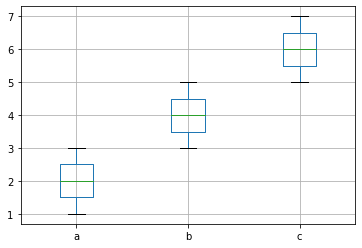

In [107]:
# ну и можно посмотреть на взаимное расположение боксплотов

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]})
data.boxplot()

#### 5. Дисперсионный анализ Уэлча

In [71]:
# import pingouin as pg
# pg.welch_anova(data=данные, dv="зависимая_переменная", between="независимая_переменная")

In [62]:
# дисперсионный анализ по формулам

from scipy import stats
import pandas as pd

data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]})
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print(f'p = {p}')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
p = 0.008000000000000002
отклоняем нулевую гипотезу


## Многофакторный дисперсионный анализ
позволяет проверить влияние нескольких факторов на зависимую переменную.

### Двухфакторный дисперсионный анализ (two-way ANNOVA)

In [111]:
import pandas as pd

data2 = pd.DataFrame({
           'c1': ['a', 'a', 'a', 'b', 'b', 'b', 'c', 'c', 'c'],
           'c2': ['high', 'low', 'low','high', 'low', 'low', 'high', 'low', 'low'],
           'c3': [3, 2, 1, 5, 3, 4, 7, 6, 5]})

#### 1. Определяем формулу для модели в statsmodels:
"зависимая переменная ~ незав.перем.1 + незав.перем.2 + взаимодействие 1 и 2"

#### 2. Проводим анализ

##### statsmodels

In [138]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


model = smf.ols(formula = 'c3 ~ c1 + c2 + c1:c2', data = data2).fit()
aov_table = anova_lm(model, typ=2)

In [125]:
print(round(aov_table, 5))

# смотрим на PR(>F) - это pvalue.
# pvalue < 0.05 - влияние фактора значимо.
# В данном случае значимо влияет только фактор c1

          sum_sq   df     F   PR(>F)
c1          24.0  2.0  24.0  0.01427
c2           4.5  1.0   9.0  0.05767
c1:c2        0.0  2.0   0.0  1.00000
Residual     1.5  3.0   NaN      NaN


##### pingouin

In [139]:
import pingouin as pg

pg.anova(data = data2, dv = 'c3', between = ['c1', 'c2'])

,Source,SS,DF,MS,F,p-unc,np2
0,c1,2.400000e+01,2.0,1.200000e+01,2.400000e+01,0.014267,9.411765e-01
1,c2,4.500000e+00,1.0,4.500000e+00,9.000000e+00,0.057669,7.500000e-01
2,c1 * c2,4.996119e-30,2.0,2.498060e-30,4.996119e-30,1.000000,3.330746e-30
3,Residual,1.500000e+00,3.0,5.000000e-01,NaN,NaN,NaN


#### 3. С помощью критерия Тьюки смотрим, между какими группами есть статистически значимые различия

In [133]:
# для этого сначала в дф добавляем колонку "взаимодействие 1 и 2" (с1\с2)

data2['combination'] = data2.c1 + " \ " + data2.c2
data2

,c1,c2,c3,combination
0,a,high,3,a \ high
1,a,low,2,a \ low
2,a,low,1,a \ low
3,b,high,5,b \ high
4,b,low,3,b \ low
5,b,low,4,b \ low
6,c,high,7,c \ high
7,c,low,6,c \ low
8,c,low,5,c \ low


##### statsmodels

In [146]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

pairwise_tukeyhsd(data2.c3, groups = data2.combination).summary()

# reject = False - H0 принимается (т.е. между группам статзначимые различия есть)
# reject = True - H0 отклоняется

group1,group2,meandiff,p-adj,lower,upper,reject
a \ high,a \ low,-1.5,0.5923,-6.4217,3.4217,False
a \ high,b \ high,2.0,0.49,-3.6831,7.6831,False
a \ high,b \ low,0.5,0.9859,-4.4217,5.4217,False
a \ high,c \ high,4.0,0.1235,-1.6831,9.6831,False
a \ high,c \ low,2.5,0.2573,-2.4217,7.4217,False
a \ low,b \ high,3.5,0.1205,-1.4217,8.4217,False
a \ low,b \ low,2.0,0.2682,-2.0185,6.0185,False
a \ low,c \ high,5.5,0.0369,0.5783,10.4217,True
a \ low,c \ low,4.0,0.0506,-0.0185,8.0185,False
b \ high,b \ low,-1.5,0.5923,-6.4217,3.4217,False


##### pingouin

In [148]:
import pingouin as pg

pg.pairwise_tukey(data = data2, dv = 'c3', between = 'combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,a \ high,a \ low,3.0,1.5,1.5,0.866025,1.732051,0.592260,0.000000
1,a \ high,b \ high,3.0,5.0,-2.0,1.000000,-2.000000,0.490030,-11.313708
2,a \ high,b \ low,3.0,3.5,-0.5,0.866025,-0.577350,0.985935,-0.000000
3,a \ high,c \ high,3.0,7.0,-4.0,1.000000,-4.000000,0.123541,-22.627417
4,a \ high,c \ low,3.0,5.5,-2.5,0.866025,-2.886751,0.257340,-0.000000
5,a \ low,b \ high,1.5,5.0,-3.5,0.866025,-4.041452,0.120476,-0.000000
6,a \ low,b \ low,1.5,3.5,-2.0,0.707107,-2.828427,0.268217,-1.616244
7,a \ low,c \ high,1.5,7.0,-5.5,0.866025,-6.350853,0.036941,-0.000000
8,a \ low,c \ low,1.5,5.5,-4.0,0.707107,-5.656854,0.050627,-3.232488
9,b \ high,b \ low,5.0,3.5,1.5,0.866025,1.732051,0.592260,0.000000


##### визуализация

<AxesSubplot:xlabel='c1', ylabel='c3'>

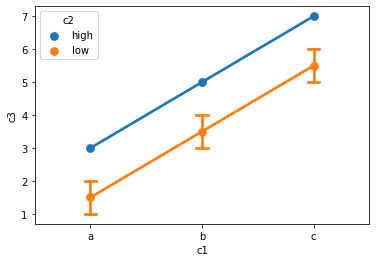

In [151]:
sns.pointplot(x = 'c1', y = 'c3', hue = 'c2', data = data2, capsize = .1)
#plt.xlabel('...')
#plt.ylabel('...')

<AxesSubplot:xlabel='c1', ylabel='c3'>

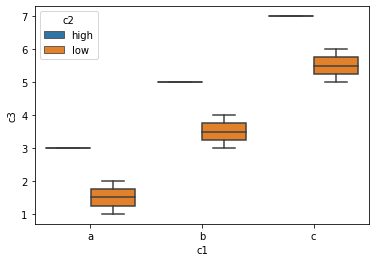

In [153]:
sns.boxplot(x = 'c1', y = 'c3', hue = 'c2', data = data2)
#plt.xlabel('...')
#plt.ylabel('...')

# Корреляционный анализ

### Коэффициент корреляции Пирсона

метод параметрической статистики, позволяющий определить наличие или отсутствие линейной связи между двумя количественными показателями, а также оценить ее тесноту и статистическую значимость. Другими словами, критерий корреляции Пирсона позволяет определить, изменяется ли (возрастает или уменьшается) один показатель в ответ на изменения другого? В статистических расчетах и выводах коэффициент корреляции обычно обозначается как rxy или Rxy.

https://medstatistic.ru/methods/methods8.html

In [154]:
import pandas as pd
from scipy import stats

data = {'list 1':[4, 5, 2, 3, 1],'list 2':[2, 1, 4 ,3, 5]}
df = pd.DataFrame(data, columns = ['list 1','list 2'])

pearson_coef, p_value = stats.pearsonr(df["list 1"], df["list 2"]) #define the columns to perform calculations on
print("Pearson Correlation Coefficient:", pearson_coef)
print("P-value:", p_value)

Pearson Correlation Coefficient: -1.0
P-value: 0.0


In [155]:
import numpy

list1 = [4, 5, 2, 3, 1]
list2 = [2, 1, 4 ,3, 5]

numpy.corrcoef(list1, list2)[0, 1]

-0.9999999999999999

In [156]:
from scipy.stats import linregress
linregress(list1, list2)
#also works with a two-row pandas.DataFrame: lineregress(two_row_df)

LinregressResult(slope=-1.0, intercept=6.0, rvalue=-1.0, pvalue=1.2004217548761408e-30, stderr=0.0, intercept_stderr=0.0)